In [19]:
import sys

root_path = '/cs/cs152/individual/ishita'

if root_path not in sys.path:
    sys.path.insert(1, root_path)
    
from models.vae import VariationalAutoencoder
from utils.vistools import * 
from scripts.train_pcvae import loadData
from scripts.blackout_images import blackout_dataloader

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [21]:
DATASET_NAME = "MNIST"
NUM_TRAIN = 20
BATCH_SIZE = 128
data_l, data_u = blackout_dataloader(DATASET_NAME, NUM_TRAIN)
dataLoader_l = DataLoader(data_l, batch_size=BATCH_SIZE, shuffle=True)
dataLoader_u = DataLoader(data_u, batch_size=BATCH_SIZE, shuffle=False)

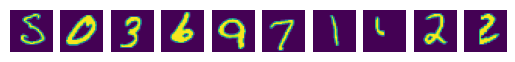

In [26]:
images, labels = next(iter(dataLoader_l))

# Display the images
fig, axes = plt.subplots(1, 10)
for i in range(10):
    axes[i].imshow(images[i].permute(1, 2, 0))  # Permute to get correct channel order
    axes[i].axis('off')

plt.show()